# Algoritmo DES

CC. Dra. Rocío Aldeco-Pérez.

DES es un algoritmo complejo que opera en bloques de 64 bits, con una clave de bits. Esto hace que sea casi imposible trabajar a través del algoritmo a mano para tener una idea de cómo funciona. Para ayudar a entender las complejidades y el funcionamiento interno de DES, se ha desarrollado una versión simplificada por Edward Schaefer [1]. El cifrado y descifrado de este cifrado simplificado se puede realizar a mano, lo que brinda una valiosa información sobre el funcionamiento y diseño de DES.

# Permutación inicial

Esto comienza permutando los bits del texto plano.



 Es decir, el bit 0 termina en el tercer lugar, el bit termina en el lugar cero, el bit 2 termina en el segundo lugar, y así sucesivamente (para toda discusión de sDES, las listas y matrices se indexarán comenzando en cero).
 
 
 
  Esta permutación se puede expresar más simplemente como (1,5,2,0,3,7,4,6). Correspondiendo a esta permutación inicial está su inversa, que simplemente devuelve los bits donde comenzaron:
  
  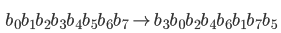
  
   (3,0,2,4,6,1,7,5).\
   Para ver cómo funciona, considere el bit 1 del texto plano. Según la permutación inicial, se coloca en la posición 5. Ahora observe la permutación inversa. El bit 5 se coloca en la posición 1, exactamente donde comenzó. La siguiente figura muestra lo anterior.

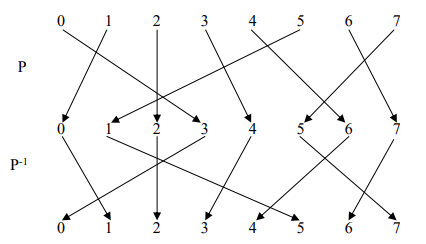


# Subclaves

EL DES simplificado usa claves de 10 bits, de la cual se utilizan subclaves de 8 bits en cada ronda. Estas claves se obtiene de la siguiente forma:

- Los diez bits de la clave se permutan de acuerdo a la permutación (2,4,1 6,3 9,0 8,7 5) 

- El resultado se divide en 2 mitades de 5 bits cada una.

- Para la primera ronda, cada mitad se desplaza cíclicamente un bit hacia la izquierda. 

- La subclave uno se obtiene tomando estos bits del resultado de la última operación: (5,2,6,3,7,4,9,8) 

- Para la segunda ronda, el resultado del paso 3 se desplaza dos bits hacia la izquierda.

- Luego, la subclave dos se obtiene tomando los mismos bits que se usaron para la subclave uno. 

Si la clave es:



Entonces las subclaves son:

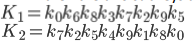

# Paso de Feistel

En el corazón del sDES se encuentra una función de tipo Feistel, como se muestra en la siguiente figura. Nótese que las mitades izquierda y derecha no se intercambian, como lo hacen en la estructura de Feistel revisada en nuestras sesiones.

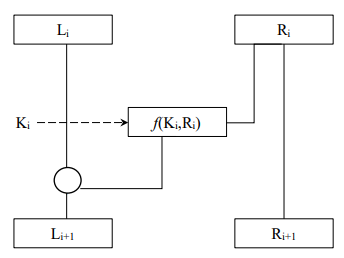

# La función de mezcla

La siguiente parte del sDES es la función f(Ki, Ri) que mezcla los bits en la estructura mostrada en la Figura 2. Las entradas son una subclave de 8 bits y un bloque de 4 bits, que primero se expande a 8 bits.



La subclave se XOR-iza con esta expansión, y el resultado se divide en dos mitades de 4 bits cada una. Estas mitades se convierten en 2 bits cada una mediante dos cajas S, S0 y S1. Luego se unen para formar 4 bits y se permutan según:



Las cajas S están definidas por las tablas:

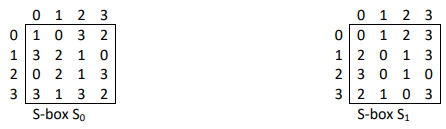

Para aplicar una caja S, por ejemplo S0, suponga que los 4 bits de entrada son x0, x1, x2 y x3. Los dos bits externos dan el número de fila; los dos bits internos dan el número de columna. Por ejemplo, 1011 tiene la fila 11, o 3, y la columna 01, o 1. En la fila 3 y columna 1 se encuentra el valor 1, o 01 binario. Toda la función de mezcla se muestra en la siguiente figura:

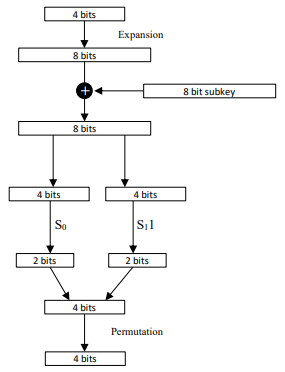




# Rondas

sDES tiene 2 rondas. La primera ronda involucra cambiar de lugar las dos mitades de las salidas Feistel; la segunda los mantiene tal cual. Por tanto, un cifrado completo con sDES sería:

- Permutación inicial
- Operación Feistel usando la subclave K1
- Intercambiar las mitades izquierda y derecha
- Operación Feistel usando la subclave K2
- Permutación inversa

*Paso 1*\
\
Usando como ejemplo un texto plano de la forma 01010101 y una clave 0000011111, la permutación inicial se puede obtener de la forma:

In [507]:
def initial_permutation(plain_text):
    # Con base en una tabla de permutaciones, cambia de posición los bits en la cadena de entrada.
    permuted_text = ""
    permutation_table = [1, 5, 2, 0, 3, 7, 4, 6]
    #P[1] = P'[0], P[5] = P'[1], P[2] = P'[2], P[0] = P'[3], P[3] = P'[4],  P[7] = P'[5], P[4] = P'[6], P[6] = P'[7]
    for i in permutation_table:
        permuted_text += plain_text[i]
    return permuted_text

In [508]:
def shift_left(binary_str):
    return binary_str[1:] + binary_str[0]

def shift_left2(binary_str):
    return binary_str[1:] + binary_str[0]

def shift_left3(binary_str):
    return binary_str[2:] + binary_str[:2]

def shift_left4(binary_str):
    return binary_str[2:] + binary_str[:2]

In [509]:
def subkeys(key):
    #Obtiene las 2 subclaves a usar en el cifrado sDES.
    perm_table = [2, 4, 1, 6, 3, 9, 0, 8, 7, 5] #Tabla de permutaciones. 
    perm_10keys = ""

    # Permuta los primeros 10 bits de la clave.
    for i in perm_table:
        perm_10keys += key[i]

    print("Bits permutados de la clave:", perm_10keys)

    #Divide en 2 mitades de 5 bits cada una. 
    left_half = perm_10keys[:5]
    right_half = perm_10keys[5:10]

    #print("Mitades obtenidas:", left_half, right_half)

    #Round 1: mueve 1 bit a la izquierda.
    left_half = shift_left(left_half)
    right_half = shift_left2(right_half)

    #print("Mitades recorridas 1 posición a la izquierda: ", left_half, right_half)

    #Obteniendo la primera subkey.
    key1_table = [5, 2, 6, 3, 7, 4, 9, 8]
    subkey1 = ""

    keystep = left_half + right_half

    for i in key1_table:
        subkey1 += keystep[i]
    
    #print(subkey1)

    #Round 2: mueve 2 bit a la izquierda lo obtenido en el paso 3. 
    left_half = shift_left3(left_half)
    right_half = shift_left4(right_half)

    #print("Mitades recorridas 2 posiciones a la izquierda: ", left_half, right_half)

    #Obteniendo la segunda subkey.
    keystep = left_half + right_half
    subkey2 = ""

    for i in key1_table:
        subkey2 += keystep[i]

    return subkey1, subkey2

*Paso 2*\
\
Las mitades izquierda y derecha del paso anterior serían 1100 y 1100, respectivamente. La mitad izquierda deberá mezclarse con la subclave L1, lo cual se realiza usando la función de mezcla de sDES. A continuación se presenta una propuesta de implementación de la misma:

In [510]:
def xor(x, y):
    return '{1:0{0}b}'.format(len(x), int(x, 2) ^ int(y, 2))

In [511]:
def mix(subkey, left, right):
      #Implementa la función de mezcla simplificada de sDES.
      
      expansion_table = [3, 0, 1, 2, 1, 2, 3, 0] #Tabla de permutaciones. 
      expanded_block = ""

      # Expande el bloque a 8 bits con un ciclo for que asigna los bits de acuerdo al arreglo de permutaciones.
      for i in expansion_table:
            expanded_block += right[i]

      print("Bloque expandido a 8 bits:", expanded_block)

      # XOR subclave con el bloque expandido.
      xored = xor(expanded_block, subkey)
      print("XOR entre la subclave y el bloque:", xored)

      # Divide en 2 mitades de 4 bits.
      left_half = xored[:4]
      right_half = xored[4:]

      print("Mitades izquierda y derecha:", left_half, right_half)

      # Definición de S-Boxes.      

      sbox_0 = {
      "00": "01",
      "01": "00",
      "02": "11",
      "03": "10",
      "10": "11",
      "11": "10",
      "12": "01",
      "13": "00",
      "20": "00",
      "21": "10",
      "22": "01",
      "23": "11",
      "30": "11",
      "31": "01",
      "32": "11",
      "33": "10"
      }

      sbox_1 = {
      "00": "00",
      "01": "01",
      "02": "10",
      "03": "11",
      "10": "10",
      "11": "00",
      "12": "01",
      "13": "11",
      "20": "11",
      "21": "00",
      "22": "01",
      "23": "00",
      "30": "10",
      "31": "01",
      "32": "00",
      "33": "11"
      }

      #Calculamos la salida con base en las S-Box en forma de diccionarios. Ej: 1011: Fila 11-3 y columna 01: 1.

      rowleft = str(int(left_half[0] + left_half[3], 2))
      columnleft = str(int(left_half[1] + left_half[2], 2))

      print("Parámetros a la primera S-box:", rowleft+columnleft)
      
      #Obtenemos la salida consultando a los diccionarios.
      output1 = sbox_0[rowleft+columnleft]
      print("Salida S0:", output1)

      rowright = str(int(right_half[0] + right_half[3], 2))
      columnright = str(int(right_half[1] + right_half[2], 2))

      print("Parámetros a la segunda S-box:", rowright+columnright)

      output2 = sbox_1[rowright+columnright]
      print("Salida S1:", output2)

      #Concatenamos los outputs y permutamos.
      output = output1+output2
      print("Concatenación:", output)

      perm_table = [1, 3, 2, 0] #Tabla de permutaciones. 
      perm_output = ""

      # Expande el bloque a 8 bits con un ciclo for que asigna los bits de acuerdo al arreglo de permutaciones.
      for i in perm_table:
            perm_output += output[i]
      print("Permutado:", perm_output)
      
      print("Al XOR", perm_output, left)
      #Aplicamos XOR con la mitad izquierda:
      xorleft = xor(perm_output, left)
      print("XOR con la izquierda:", xorleft)

      #Concatenamos con la derecha para producir el output final
      print(right)

      return xorleft+right

*Paso 3*\
\
Intercambiamos las mitades izquierda y derecha de la fase anterior:

In [512]:
#lswap= step2[:4]
#rswap = step2[4:]

#swap = rswap + lswap
#print("Salida del paso 3:", swap)

#left_block = swap[:4]
#right_block = swap[4:8]

#print("Bloques actuales", left_block, right_block)

*Paso 4*\
\
 Ahora, siendo la parte izquierda 1100, derecha 0000, y la subclave 10101010, expandemos la parte derecha:

In [513]:
#step4= mix(subkey2 ,left_block, right_block)
#print("Salida del paso 4:", step4)

*Paso 5*\
\
Por último, permutamos nuevamente a la inversa:

In [514]:
def last_permutation(plain_text):
    # Con base en una tabla de permutaciones, cambia de posición los bits en la cadena de entrada.
    permuted_text = ""
    permutation_table = [3, 0, 2, 4, 6, 1, 7, 5]

    for i in permutation_table:
        permuted_text += plain_text[i]
    return permuted_text

In [515]:
#ciphered_output = last_permutation(step4)
#print("Texto en claro permutado:", ciphered_output)

# Vectores de prueba

Ahora, utilizaremos los siguientes vectores de prueba para verificar el funcionamiento de la implementación de sDES realizada:

| Clave | Texto plano | Criptograma
| --- | --- | --- | 
| 0000011111 | 01010101 | 11000100 |
| 0010010111 | 00110110 | 10100101 | 
| 0000000000 | 00000000 | 11110000 | 
| 1111111111 | 11111111 | 00001111 | 

In [516]:
def sDES(key, plaintext):
    print("Clave:", key)
    print("Texto plano:", plaintext)

    #Paso 1
    perm_text = initial_permutation(plaintext)
    print("Permutación del paso 1:", perm_text)
    subkey1, subkey2 = subkeys(key)
    print("Subclaves generadas:", subkey1, subkey2)

    #Paso 2
    left_block = perm_text[:4]
    right_block = perm_text[4:8]
    step2 = mix(subkey1, left_block, right_block)
    print("Salida del paso 2:", step2)

    #Paso 3
    lswap= step2[:4]
    rswap = step2[4:]

    swap = rswap + lswap
    print("Salida del paso 3:", swap)

    #Paso 4
    left_block = swap[:4]
    right_block = swap[4:8]
    print("Nuevos bloques izquierdo y derecho para el paso 4", left_block, right_block)
    step4= mix(subkey2 ,left_block, right_block)
    print("Salida del paso 4:", step4)


    #Paso 5
    ciphered_output = last_permutation(step4)

    return ciphered_output

In [517]:
# Probamos vectores.
key1 = '0000011111'
plaintext1 = '01010101'

key2 = '0010010111'
plaintext2 = '00110110'

key3 = '0000000000'
plaintext3 = '00000000'

key4 = '1111111111'
plaintext4 = '11111111'

print("\nIniciando cifrado con sDES...\n")

assert sDES(key1, plaintext1) == '11000100'
print("Pass! Resultado:", sDES(key1, plaintext1))

assert sDES(key2, plaintext2) == '01011010'
print("Pass! Resultado:", sDES(key2, plaintext2))
assert sDES(key3, plaintext3) == '11110000'
print("Pass! Resultado:", sDES(key3, plaintext3))
assert sDES(key4, plaintext4) == '00001111'
print("Pass! Resultado:", sDES(key4, plaintext4))


Iniciando cifrado con sDES...

Clave: 0000011111
Texto plano: 01010101
Permutación del paso 1: 11001100
Bits permutados de la clave: 0001010111
Subclaves generadas: 01101011 10101010
Bloque expandido a 8 bits: 01101001
XOR entre la subclave y el bloque: 00000010
Mitades izquierda y derecha: 0000 0010
Parámetros a la primera S-box: 00
Salida S0: 01
Parámetros a la segunda S-box: 01
Salida S1: 01
Concatenación: 0101
Permutado: 1100
Al XOR 1100 1100
XOR con la izquierda: 0000
1100
Salida del paso 2: 00001100
Salida del paso 3: 11000000
Nuevos bloques izquierdo y derecho para el paso 4 1100 0000
Bloque expandido a 8 bits: 00000000
XOR entre la subclave y el bloque: 10101010
Mitades izquierda y derecha: 1010 1010
Parámetros a la primera S-box: 21
Salida S0: 10
Parámetros a la segunda S-box: 21
Salida S1: 00
Concatenación: 1000
Permutado: 0001
Al XOR 0001 1100
XOR con la izquierda: 1101
0000
Salida del paso 4: 11010000
Clave: 0000011111
Texto plano: 01010101
Permutación del paso 1: 11001100